In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# <center> Treinamento de Probabilidade e Inferência Estatística (31/08/2022) </center>

# <center> Parte 1: Probabilidade </center>

Em ciência de dados é importante entender corretamente as ferramentas que estamos utilizando para não afirmar coisas que não são possíveis de se afirmar. Fazemos isso compreendendo bem probabilidade, o que ela mede, quais detalhes estão escondidos atrás da intuição e suas limitações.

___

# Definição de probabilidade

## Intuição

Imagine que queremos modelar o experimento de lançamento de um dado. Neste caso, os valores possíveis são $\{ 1,2,3,4,5,6\}$.

A probabilidade responde qual a chance de acontecer um evento que é um **subconjunto** dos possíveis valores do **experimento aleatório**. Por exemplo, podemos estar interessados em entender qual a chance de o dado sair com a face para cima sendo um número par (isto é, qual a probabilidade de acontecer o subconjunto $\{2,4,6\}$ no experimento aleatório).

## Definição a partir de objetos matemáticos

**Definição (espaço amostral):** O **espaço amostral** $\Omega$ de um experimento aleatório é o conjunto de todos os resultados possíveis. Os resultados possíveis são chamados de **pontos amostrais** $\omega \in \Omega$ e incluem todas informações sobre o experimento.

**"Definição" (evento):** Um **evento** $E$ é um subconjunto do espaço amostral, isto é, $E\in\wp(\Omega)$. Estes são os argumentos da nossa função de probabilidade: poderemos perguntar qual a probabilidade de um determinado evento ocorrer.

**Pergunta**: Imagine o experimento de lançamento de uma moeda. Qual é o espaço amostral e os possíveis eventos?

- Os possíveis resultados são $\omega = H$ ou $\omega = T$, portanto $\Omega = \{ H, T \}$.
- Os eventos aqui são dados pelos conjuntos $\varnothing$, $\{H\}$, $\{T \}$ e $\{H,T\}$.

Ainda não definimos o que é uma probabilidade. Ela vai ser algo que vai medir "o quão provável um evento é de acontecer". É esperado que ela satisfaça algumas condições razoáveis.

- Primeiro, a probabilidade precisa ser um valor entre $0$ e $1$.


- Além disso, a probabilidade de algum dos resultados possíveis acontecer tem que ser 1. Isto é, a probabilidade do espaço amostral deve ser 1, pois ele é o conjunto de todos os resultados possíveis.

- Por fim, se a probabilidade de, em um dado, tirar um $1$ é $3/10$ e a probabilidade de tirar $2$ é $1/10$ então a probabilidade de tirar $1$ ou $2$ deve ser $3/10+1/10=4/10$.

**"Definição" (probabildade):** Uma **probabilidade** $\mathbb{P}$ é uma função com domínio no conjunto de eventos $\wp(\Omega)$ e contradomínio em $[0,1]$, isto é, $\mathbb{P}:\wp(\Omega)\to[0,1]$ que satisfaz as seguintes propriedades:

$$\mathbb{P}(\Omega) = 1 \textrm{, e }\mathbb{P}\left( E_1\cup E_2\right) = \mathbb{P}\left( E_1 \right)  + \mathbb{P}\left( E_2 \right),$$

para $E_1$ e $E_2$ conjuntos disjuntos de $\Omega$.

Suponha, agora, que jogue três moedas honestas. Qual é o espaço amostral, os possíveis eventos e a função de probabilidade?

- Agora temos que $\Omega = \{ H , T \}^3$ $= \{(\omega_1, \omega_2, \omega_3):\omega_i\in\{H,T\} \}=$ $\{ (H,H,H)$, $(T,H,H)$, $(H,T,H)$, $(H,H,T)$, $(H,T,T)$, $(T,H,T)$, $(T,T,H)$, $(T,T,T) \}$.

- Os eventos aqui são dados pelo conjunto das partes de $\Omega$. Alguns exemplos são $\varnothing$, $\{ (H,T,H)\}$, $\{(H,H,H),(T,T,T)\}$, $\{ \omega \in \Omega : \textrm{primeiro lançamento é cara} \}$.

- A probabilidade de cada elemento individualmente de $\Omega$ é $1/8$. A probabilidade de um evento qualquer é $1/8$ vezes o número de elementos naquele evento.


## Comentários extras

$\oint$ *A Probabilidade é um objeto matemático que usualmente é apresentada a partir das suas propriedades, maneira como fizemos aqui. Entretanto, os estatísticos bayesianos gostam de defini-la como um objeto que quantifica uma [relação transitiva](https://pt.wikipedia.org/wiki/Rela%C3%A7%C3%A3o_transitiva) representando um conceito de [crença](https://en.wikipedia.org/wiki/Bayesian_probability) sobre eventos possíveis. Essa estratégia é um jeito de **matematizar de forma rigorosa a nossa intuição**. O livro [Optimal statistical decisions do De Groot](https://onlinelibrary.wiley.com/doi/book/10.1002/0471729000) é uma ótima referência para quem quiser conhecer melhor o assunto.*

$\oint$ *Na prática, dependendo das propriedades que você gostaria que sua probabilidade satisfizesse, nem todo conjunto poderá ter probabilidade. Isso nos faz reduzir o domínio da probabilidade para um subconjunto $\mathcal{F}$ do conjunto das partes. Esse subconjunto $\mathcal{F}$ precisa satisfazer algumas propriedades razoáveis como $\Omega \in \mathcal{F}$, $A \in \mathcal{F} \implies A^C \in \mathcal{F}$ e é chamado de **$\sigma$-álgebra**.*

$\oint$ *Alinhada com essa definição formal do domínio, a definição da probabilidade também muda. Na prática, a gente precisa da $\sigma$-aditividade, que significa que a probabilidade de uma união enumerável de conjuntos disjuntos é a soma infinita das probabilidades de cada um dos conjuntos:*
$$\mathbb{P}\left( \bigcup_{i=1}^\infty E_i\right) = \sum_{i=1}^\infty \mathbb{P}\left( E_i \right).$$

$\oint$ *Não vou mais fazer esses comentários levando em conta $\sigma$-algébras e outros aspectos mais formais, mas tenha em mente que todas as definições que estamos fazendo, inclusive quando falarmos de inferência estatística, são formalizadas por essa linguagem. Um ótimo recurso para começar a ver isso é o canal [A Ciência da Estatística](https://www.youtube.com/c/ACi%C3%AAnciadaEstat%C3%ADstica). Em um dos seus vídeos, o professor Alexandre Patriota [comenta sobre os diferentes níveis de se encarar a probabilidade](https://www.youtube.com/playlist?list=PL5Dg8nFln2eWW7K8GUHEGE1lSXiL151ii): **elementar**, **básico**, **intermediário** e **avançado** (essa nomeclatura não foi inventada, vide o ótimo livro do IMPA [Probabilidade: Um Curso em Nível Intermediário, do Barry James](https://impa.br/page-livros/probabilidade-um-curso-em-nivel-intermediario/)). Neste treinamento, trataremos os assuntos num nível básico, mas fica o convite para o estudo do nível intermediário (que vem com muita análise real e que é muito útil para encarar algoritmos numéricos).*

___

# Variáveis Aleatórias

**"Definição" (variável aleatória):** Uma **variável aleatória** $X$ é uma função que sai do espaço amostral $\Omega$ e chega na reta $\mathbb{R}$, isto é, $X:\Omega\to\mathbb{R}$. 

No exemplo anterior uma possível variável aleatória poderia ser o número de caras. Para cada elemento $\omega= (\omega_1, \omega_2, \omega_3) \in \Omega$, conto o número de vezes que ocorre $H$.

![](images_prob/random_variable_1.png)


Uma outra possível seria

$$X(\omega_1, \omega_2, \omega_3) = \begin{cases}
    1, \textrm{ se }\omega_1=\omega_2=\omega_3,\\
    0, \textrm{ caso contrário.}
    \end{cases}$$

![](images_prob/random_variable_2.png)


Como uma variável aleatória é uma função é possível falar sobre sua pré-imagem!

Por exemplo, repare que $X^{-1}({1}) = \{\omega \in \Omega : X(\omega) = 1 \} = \{ (H,H,H), (T,T,T) \}$. Essa pré-imagem nos permite fazer formalizar probabilidade diretamente no contradomínio da nossa função: a reta real.

____

# Probabilidade induzida

A probabilidade definida em $\Omega$ se transfere de maneira natural para $\mathbb{R}$!

Por exemplo, no caso anterior de lançamento de 3 moedas, se $X=$ número de caras. Para entender a probabilidade de $X$ ser igual a $2$, simplesmente olho para a pré-imagem de $2$ em $\Omega$, ou seja, os $\omega\in\Omega$ tais que $X(\omega)=2$ e vejo qual a probabilidade desse evento!

Temos que $\{ \omega \in \Omega: X(\omega) = 2\} =  \{ (H,H,T), (H,T,H), (T,H,H) \}$

Com isso, podemos definir

$$\mathbb{P}_{\mathbb{R}}(X=2) = \mathbb{P}(\{ \omega \in \Omega: X(\omega) = 2\}) =
\mathbb{P}(\{ (H,H,T), (H,T,H), (T,H,H) \}) =\\= \mathbb{P}(\{(H,H,T)\}) +  \mathbb{P}(\{(H,H,T)\}) +  \mathbb{P}(\{(H,H,T)\}) = 3 \cdot \frac{1}{8}.$$

De forma análoga, podemos definir probabilidade para subconjuntos de números reais agora! Em particular, vamos estar bastante interessados em medir a probabilidade de intervalos!

Podemos fazer então a função $\mathbb{P}_X:\wp(\mathbb{R})\to [0,1]$ que recebe um conjunto da reta, vê quais são os valores de $\Omega$ que são mapeados dentro daquele conjunto e então calcula a probabilidade desse conjunto!

Seja $A\subset \mathbb{R}$, podemos fazer

$$    \mathbb{P}_{X}(A) = \mathbb{P}(\{ \omega \in \Omega: X(\omega) \in A\}).$$

___

# Função densidade acumulada (fda) e função densidade de probabilidade (fdp)

Alguns intervalos importantes são os da forma $(-\infty, t]$. Por exemplo, no caso anterior, poderíamos querer calcular a probabilidade de o número de caras ser menor ou igual a 1.

Como fizemos no caso anterior, vamos olhar para quais valores do espaço amostral são mapeados pela nossa variável aleatória como sendo menores ou iguais a 1. Escrevendo na forma de conjunto, temos

$$
    \{ \omega \in \Omega: X(\omega) \leq1 \} =  \{ (T,T,T), (H,T,T), (T,H,T), (T,T,H) \}.$$

E daí, a probabilidade

$$
    \mathbb{P}_{X}((-\infty,1]) = \mathbb{P}(\{ \omega \in \Omega: X(\omega) \leq1 \}) = 4 \cdot \frac{1}{8}.$$

De fato, os conjuntos do tipo $(-\infty, t]$ são tão importantes que definimos uma função chamada **função distribuição acumulada** dada por

$$
    F_X(t) = \mathbb{P}_{X}((-\infty,t]) = \mathbb{P}(\{ \omega \in \Omega: X(\omega) \leq t \}) .$$

![](images_prob/cumulative_probability.png)


O conjunto dos possíveis valores que uma variável aleatória pode assumir é chamado de **suporte** e muitas vezes é representado por $\mathfrak{X}$.

Nos problemas que estamos analisando até agora, estamos trabalhando com um número contável de valores possíveis para a variável aleatória. Neste caso, podemos calcular a probabilidade desses eventos unitários. Guardá-los pode ser útil, pois são os únicos valores possíveis que têm "massa".


A **função de massa de probabilidade** (também chamada de função densidade de probabilidade), nesse caso, pode ser escrita como

\begin{equation*}
    F_X(t) = \sum_{\substack{x\in \mathfrak{X}\\ x \leq t}} \mathbb{P}(X=x) ,
\end{equation*}

e dizemos que nossa variável aleatória é **discreta**.

Em alguns casos poderemos escrever $F_X(t)$ na forma

\begin{equation*}
    F_X(t) = \int_{-\infty}^t f_X(x) \, dx,
\end{equation*}

e, $f_X$ será chamada de **densidade de probabilidade** $X$ e diremos que nossa variável aleatória é **absolutamente contínua**.

![](images_prob/continuous_random_variable_1.png)


![](images_prob/continuous_random_variable_2.png)


Com a função densidade de probabilidade acumulada podemos calcular a probabilidade de intervalos:

\begin{equation*}
    \mathbb{P}_{X}((t_1,t_2]) =  \mathbb{P}_{X}((-\infty,t_2]) - \mathbb{P}_{X}((-\infty,t_1]) = F_X(t_2) - F_X(t1).
\end{equation*}

No caso discreto ficamos com

\begin{equation*}
    \mathbb{P}_{X}((t_1,t_2]) = \sum_{\substack{x\in \mathfrak{X}\\ t_1<x \leq t_2}} \mathbb{P}(X=x) ,
\end{equation*}

e no caso contínuo temos

\begin{equation*}
    \mathbb{P}_{X}((t_1,t_2]) = \int_{t_1}^{t_2} f_X(x) \, dx.
\end{equation*}

___

# Distribuições clássicas: suas funções (densidade) de probabilidade

Diferentes variáveis aleatórias terão funções de massa ou funções de densidade de probabilidade diferentes.

## Discretas

Dizemos que uma variável aleatória $X$ discreta tem distribuição **Bernoulli** de parâmetro $p\in(0,1)$ ($X\sim \textrm{Bernoulli}(p)$) quando 

\begin{equation*}
 \mathbb{P}(X=k)=p^k(1-p)^{k-1} \textrm{ se }k\in\{0,1\}\textrm{, e }0,\textrm{ caso contrário.}
\end{equation*}

Dizemos que uma variável aleatória $X$ discreta tem distribuição **Binomial** de parâmetros $n\in\mathbb{N}^*$ $p\in(0,1)$ ($X\sim \textrm{Binomial}(n,p)$) 

\begin{equation*}
 \mathbb{P}(X=k)=\left(\begin{array}{c}n\\k\end{array}\right) p^k(1-p)^{n-k}.
\end{equation*}

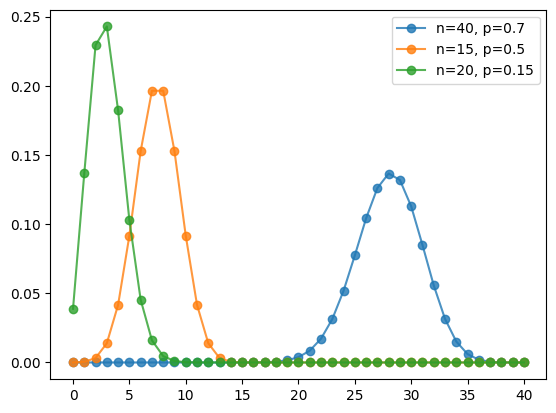

In [2]:
for n, p in zip([40, 15, 20], [0.7, 0.5, 0.15]):
    k = np.arange(0,41,1)
    plt.plot(k, scipy.stats.binom.pmf(n=n, p=p, k=k), '-o', alpha=0.8, label=f"{n=}, {p=}")
plt.legend()
plt.show()

Dizemos que uma variável aleatória $X$ discreta tem distribuição **Poisson** de parâmetros $\mu > 0$ ($X\sim \textrm{Poisson}(\mu)$) 

\begin{equation*}
 \mathbb{P}(X=k)=\frac{e^{-\mu}\mu^k}{k!}.
\end{equation*}

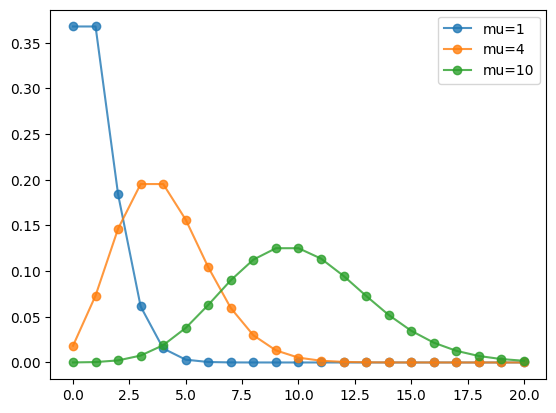

In [3]:
for mu in [1, 4, 10]:
    k = np.arange(0,21,1)
    plt.plot(k, scipy.stats.poisson.pmf(mu=mu, k=k), '-o', alpha=0.8, label=f"{mu=}")
plt.legend()
plt.show()

# Contínuas

Dizemos que uma variável aleatória $X$ contínua tem distribuição **uniforme** no intervalo $(a,b)$ para $a<b$, $a,b\in\mathbb{R}$ ($X\sim \textrm{Unif}(a,b)$) quando 

\begin{equation*}
f_X(x) = \frac{1}{(b-a)}, \textrm{ para }x\in(a,b), \textrm{ e } 0, \textrm{ caso contrário.}
\end{equation*}


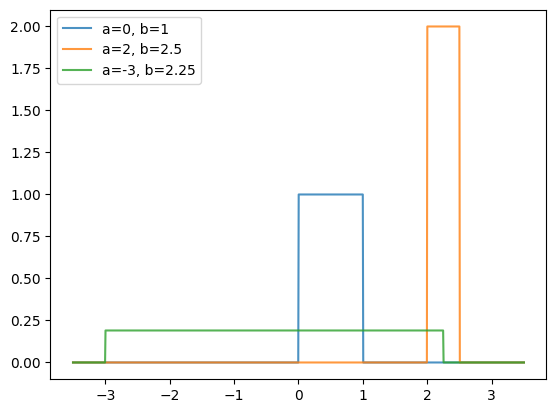

In [4]:
for a, b in zip([0, 2, -3], [1, 2.5, 2.25]):
    x = np.linspace(-3.5,3.5, 1000)
    plt.plot(x, scipy.stats.uniform(loc=a, scale=b-a).pdf(x=x), alpha=0.8, label=f"{a=}, {b=}")
plt.legend()
plt.show()

Dizemos que uma variável aleatória $X$ contínua tem distribuição **Exponencial** com parâmetro $ \lambda $, $ \lambda > 0 $ ($X\sim \textrm{Exp}(\lambda)$) quando 

\begin{equation*}
f_X(x) = \left\{\begin{array}{l}\lambda e^{-\lambda x} \ \hbox{se} \ x\geq 0\\0 \ \hbox{se} \ x \ < \ 0\end{array}\right.
\end{equation*}

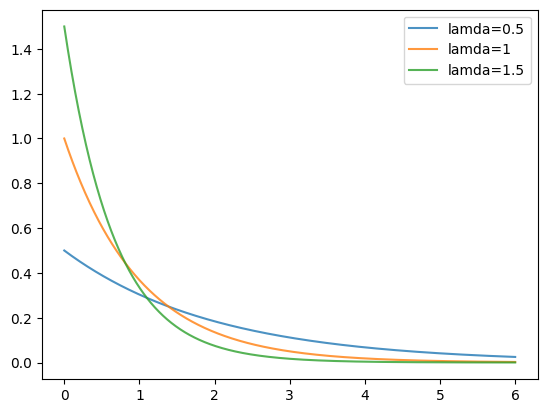

In [5]:
for lamda in [0.5, 1, 1.5]:
    x = np.linspace(0, 6, 1000)
    plt.plot(x, scipy.stats.expon(scale=1/lamda).pdf(x=x), alpha=0.8, label=f"{lamda=}")
plt.legend()
plt.show()

Dizemos que uma variável aleatória $X$ contínua tem distribuição **Normal** de média $\mu\in\mathbb{R}$ e variância $\sigma^2>0$ ($X\sim \mathcal{N}(\mu,\sigma^2)$) quando 

\begin{equation*}
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right].
\end{equation*}

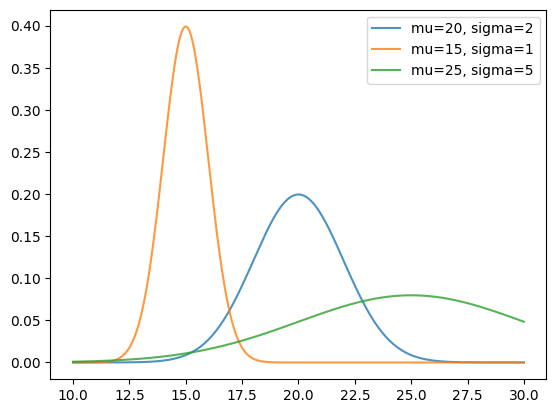

In [6]:
for mu, sigma in zip([20, 15, 25], [2, 1, 5]):
    x = np.linspace(10, 30, 1000)
    plt.plot(x, scipy.stats.norm(loc=mu, scale=sigma).pdf(x=x), alpha=0.8, label=f"{mu=}, {sigma=}")
plt.legend()
plt.show()

## Exemplo: Calculando probabilidades de distribuições contínuas

Calculando a probabilidade de um intervalo para uma distribuição uniforme utilizando a forma vista anteriormente:

\begin{equation*}
    \mathbb{P}_{X}((t_1,t_2]) = \int_{t_1}^{t_2} f_X(x) \, dx.
\end{equation*}

![](images_prob/calc_prob_uniform.png)

___

# Esperança

A **esperança** de uma variável aleatória é a soma ponderada pela distribuição. A intuição é que, se fizermos vários experimentos, obtendo diferentes valores de $X$, em média ficaremos próximos da esperança (essa afirmação é formalizada por limites de convergência).

Para uma variável aleatória contínua temos

\begin{equation*}
    \mathbb{E}(X) = \int_{-\infty}^{\infty} x \,f_X(x)\, dx,
\end{equation*}

e para uma variável aleatória discreta fazemos

\begin{equation*}
    \mathbb{E}(X) = \sum_{x\in \mathfrak{X}} x \mathbb{P}(X=x).
\end{equation*}

![](images_prob/expected_value_bernoulli.png)

![](images_prob/expected_value_uniform.png)

## Transformações de variáveis aleatórias

Se tivermos uma função $g:\mathbb{R}\to\mathbb{R}$ podemos criar uma nova variável aleatória a partir de $X$, a composta $g(X)$. Repare que, se X é uma função com domínio em $\Omega$ e contradomínio $\mathbb{R}$, então $g(X)$ também é dessa forma e por isso é uma variável aleatória no mesmo espaço.

Quando $g$ é uma função bijetora, é possível obter a distribuição de $Y = g(X)$ através do teorema da mudança de variáveis, que nos mostra como calcular a nova função densidade de probabilidade como
$$f_Y(y) = f_X(g^{-1}(y)) \left| \frac{d}{dy} g^{-1}(y)\right|.$$

$\oint$ *Se sua função não é bijetora, você precisa quebrar em regiões que o são (usualmente garantindo que a imagem é a mesma região). Um processo muito chato pra um matemático, como eu, que não gosta de fazer conta.*

Parece complicado de calcular porque na maior parte das vezes é. Para nossa sorte, se só estamos interessados na esperança da variável aleatória transformada, podemos calcular a **esperança de $g(X)$**, a partir de $X$, fazendo

\begin{equation*}
    \mathbb{E}(g(X)) = \int_{-\infty}^{\infty} g(x) \,f_X(x)\, dx,
\end{equation*}

para o caso contínuo e 

\begin{equation*}
    \mathbb{E}(X) = \sum_{x\in \mathfrak{X}} g(x) \mathbb{P}(X=x),
\end{equation*}

para o caso discreto.

___

# Variância

A última observação nos permite construir uma nova quantidade, a **variância**:

\begin{equation*}
    \textrm{Var}(X) = \mathbb{E}( (X-\mathbb{E}(X))^2).
\end{equation*}

Quando ela é finita, podemos calculá-la fazendo $\textrm{Var}(X)= \mathbb{E}(X^2) - \mathbb{E}(X)^2$. Essa quantidade é utilizada como **medida de dispersão da variável aleatória** (estamos medindo o quanto, em média, nossa variável aleatória está distante do seu ponto "central", a esperança/média).

![](images_prob/variance_uniform_1.png)

![](images_prob/variance_uniform_2.png)

___

# Vetor aleatório e densidade de probabilidade conjunta

**"Definição" (vetor aleatório)**: Dizemos que $\tilde{X} = (X_1,X_2,\cdots,X_n)$ é um **vetor aleatório** se cada uma de suas componentes é uma variável aleatória. Ou, equivalentemente, $\tilde{X}:\Omega\to\mathbb{R}^n$.

As noções de variáveis aleatórias se extendem para vetores aleatórios. Podemos definir a **esperança** de um vetor aleatório como a esperança de cada uma de suas componentes. Outras quantidades se extendem analogamente e conseguimos calcular outras medidas nesse contexto, como **covariância** etc.

Uma quantidade interessante que também está presente no contexto de vetores aleatórios são as funções massa de probabilidade e densidade de probabilidade. A ideia agora é que, ao invés de calcular $\mathbb{P}(X=x)$, estamos calculando $\mathbb{P}(\tilde{X}=\tilde{x})= \mathbb{P}(X_1=x_1,\cdots,X_n=x_n)$.

A **função densidade de probabilidade <ins>conjunta</ins>** $f_{\tilde{X}}$ que antes tinha como domínio a reta, agora tem como domínio $\mathbb{R}^n$. Antes, sua integral na reta tinha que ser 1 para que ela fosse uma função válida. Agora, sua integral em $\mathbb{R}^n$ precisa ser 1.

**Exemplo:**

![](images_prob/random_vector_dist.png)

___

# Independência entre variáveis aleatórias

**Definição** (independência entre variáveis aleatórias): Dizemos que variáveis aleatórias $X_1$ e $X_2$ são **independentes** se suas funções (densidade) de probabilidades se fatoram no produto, isto é,

$$ f_{\tilde{X}}(\tilde{x}) = f_{(X_1,X_2)}(x_1,x_2) = f_{X_1}(x_1) \cdot f_{X_2}(x_2),$$

ou

$$ \mathbb{P}(\tilde{X}=\tilde{x}) = \mathbb{P}(X_1=x_1,X_2=x_2) = \mathbb{P}(X_1=x_1)\cdot\mathbb{P}(X_2=x_2).$$

![](images_prob/random_vector_ind.png)

____

# Probabilidade Condicional

**Definição (probabilidade condicional)**: Definimos a probabilidade condicional de um evento $A\subset \Omega$ dado um outro evento $B\subset \Omega$ como

$$ \mathbb{P}(A|B) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}.$$

Vale que $\mathbb{P}(\cdot|B)$ é uma medidade de probabilidade no (novo) espaço amostral $B$. Por exemplo, vale que $\mathbb{P}(B|B)=1$. As outras propriedades decorrem de $\mathbb{P}$ ser medida de probabilidade. A interpretação intutiva é justamente essa: estamos reduzindo o espaço amostral para um subconjunto que "aconteceu". Como se você ganhasse mais informação sobre o seu sistema quando entende que $B$ ocorreu.

Lembrando sempre que quando falamos $\mathbb{P}(X=x)$, na verdade estamos fazendo $\mathbb{P}(\{ \omega \in \Omega: X(\omega) = x \})$ e que $\{ \omega \in \Omega: X(\omega) = x \} \in \wp(\Omega)$, é razoável generalizar a probabilidade condicional para variáveis aleatórias e calcular coisas como $\mathbb{P}(X = x| Y \geq y)$.

**Definição (variável aleatória condicional)**: Seja $(X,Y)$ um vetor aleatório com função densidade (massa) de probabilidade $f_{(X,y)}(x,y)$. A variável aleatória $X$ pode ser condicionada em um determinado valor de $Y=y$ (tal quer $f_Y(y)>0$), definindo a **variável aleatória condicional** $X|Y=y$ com função densidade (massa) de probabilidade

$$ f_{X|Y=y}(x) = \frac{f_{(X,Y)}(x,y)}{f_Y(y)}. $$

**Exemplo**: Seja $X$ e $Y$ vetores aleatórios. Temos que $(X|Y=y)\sim X$ para qualquer escolha de $y$ no suporte de $Y$:

$$ f_{X|Y=y}(x) = \frac{f_{(X,Y)}(x,y)}{f_Y(y)}  = \frac{f_{X}(x) f_{Y}(y)}{f_Y(y)} = f_{X}(x). $$

## Distribuição marginal

A ideia de marginalizar um vetor aleatório é descobrir a distribuição de alguma das componentes desse vetor (ou de um subconjunto dessas componentes) tendo apenas acesso à função densidade (massa) de probabilidade conjunta $f_{\tilde{X}}(\tilde{x})$.

Por exemplo, se temos um vetor aleatório $(X, Y, W)$ e queremos calcular a distribuição de $X$, fazemos

$$ f_X(x) = \int_{\mathbb{R}^2} f_{(X, Y, W)}(x, y, w) dy dw. $$

Para ter a distribuição de $(X, W)$ fazemos

$$ f_X(x) = \int_{\mathbb{R}} f_{(X, Y, W)}(x, y, w) dy, $$

e assim por diante. A ideia para o caso discreto é análogo a partir do somatório com a função massa de probabilidade.

**Exemplo**: Seja $(X,Y)$ vetor aleatório tal que $f_{(X,Y)}(x,y) = \frac{3}{2}$ para $x^2\leq y\leq 1$ e $0<x<1$. Vamos calcular a distribuição condicional de $Y$ dado $X=x$.

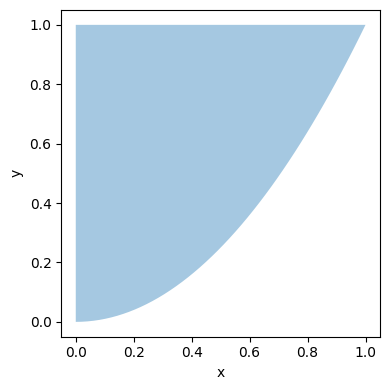

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
ax.fill_between(np.linspace(0, 1), np.linspace(0, 1)**2, y2=1, alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()

Para achar a distribuição de $Y|X=x$, precisamos primeiro achar a distribuição de $X$. Para isso, fazemos

$$ f_X(x) = \int_{x^2}^1 \frac{3}{2} dy = \left[\frac{3}{2} y \right]_{x^2}^{1} = \frac{3}{2} (1-x^2).$$

para $0<x<1$. E daí, temos que

$$ f_{Y | X=x}(y) = \frac{f_{(X,Y)}(x,y)}{f_X(x)} = \frac{\frac{3}{2}}{\frac{3}{2}(1-x^2) } = \frac{1}{1-x^2},$$

para $x^2\leq y\leq 1$ (mantendo a restrição sempre que $0<x<1$).

Repare que a variável aleatória $Y|X=x \sim \textrm{Unif}(x^2, 1)$.

É possível definir ainda a **esperanção condicional** como sendo a esperança da variável aleatória condicionada. Para o nosso exemplo, faríamos

$$\mathbb{E}(Y|X=x) = \int_{\mathbb{R}} y f_{Y|X=x}(y) dy =  \int_{x^2}^1  y \frac{1}{1-x^2} dy = \left[\frac{1}{1-x^2} \frac{y^2}{2} \right]_{x^2}^{1} = \frac{1 - x^4}{2(1-x^2)} $$

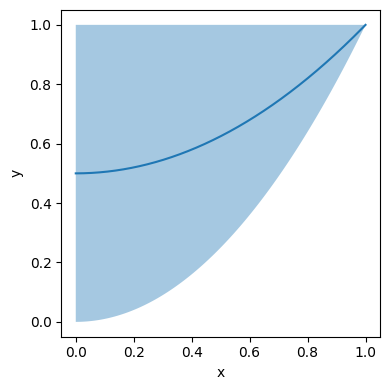

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
x_ = np.linspace(0, 1, 10002)[1:-1]
ax.fill_between(x_, x_**2, y2=1, alpha=0.4)
ax.plot(x_, (1-x_**4)/(2*(1-x_**2)))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()

Essa é a base para problemas supervisionados de regressão.

___

# Derivada de Radon–Nikodym

Em muitos casos práticos, vamos querer calcular quantidades de interesse (como a esperança) para alguma variável aleatória, entretanto, não teremos acesso a ela por completo. Para exemplificar, imagine que temos acesso a uma amostra com um **viés de seleção** alto (exemplo: só temos a marcação de inadimplência ou não para pessoas que foram atrás de um empréstimo no passado de fato foram aprovadas no processo de análise de crédito anterior).

Mas em alguns casos, vamos querer inferir informações gerais para uma população que não temos acesso.

In [9]:
def radon_nik_example(p=[0.4, 0.3, 0.3], size=10000):
    map_dic = {'18-30': 0.6, '31-50': 0.3, '>50': 0.5}
    x = np.random.RandomState(42).choice(['18-30', '31-50', '>50'], p=p, size=size)
    y = np.array(list(map(lambda x: np.random.binomial(1, map_dic[x]), x)))
    return x, y

x_real, y_real = radon_nik_example()
x_obs, y_obs = radon_nik_example([0.1, 0.7, 0.2])

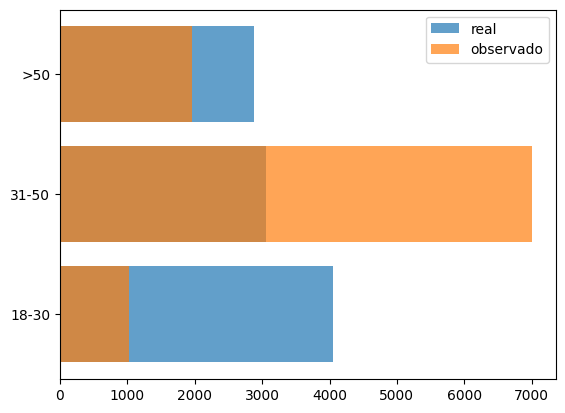

In [10]:
def plot_hist(x, label):
    unique, counts = np.unique(x, return_counts=True)
    plt.barh(unique, counts, alpha=0.7, label=label)

plot_hist(x_real, 'real')
plot_hist(x_obs, 'observado')
plt.legend()
plt.show()

Imagine que o nosso problema é estimar a média de $Y$ da população "real". Será que é possível fazer inferência sobre `y_real` utilizando `x_real`, `x_obs` e `y_obs`?

Suponha que $Y_r$ é uma tranformação sem componentes aleatórias de $X_r$ da forma $Y_r=g(X_r)$. Neste caso, calcular a esperança de $Y_r$ é da forma

\begin{equation*}
    \mathbb{E}(g(X_r)) = \sum_{x\in \mathfrak{X}} g(x) \mathbb{P}(X_r=x).
\end{equation*}

Para simplificar a notação, vamos chamar $f_r(x) = \mathbb{P}(X_r=x)$. Então

\begin{equation*}
    \mathbb{E}(g(X_r)) = g(\textrm{'18-30'}) f_r(\textrm{'18-30'}) + g(\textrm{'31-50'}) f_r(\textrm{'31-50'}) + g(\textrm{'>50'}) f_r(\textrm{'>50'}).
\end{equation*}

Repare que se multiplicamos cada termo do somatório por 

$$ \frac{f_o(x)}{f_o(x)}=1,$$

em que $f_o(x)=\mathbb{P}(X_o=x)$, então não estamos mudando o valor final da expressão:

\begin{align*}
    \mathbb{E}(g(X_r)) &= \sum_{x\in \mathfrak{X}} g(x) f_r(x) = \sum_{x\in \mathfrak{X}} g(x) f_r(x) \frac{f_o(x)}{f_o(x)} \\
    &= \sum_{x\in \mathfrak{X}} g(x) \frac{f_r(x)}{f_o(x)} f_o(x) = \mathbb{E}\left(g(X_o) \, \frac{f_r(X_o)}{f_o(X_o)}\right) .
\end{align*}

Logo, é possível calcular a esperança para $Y_r$ utilizando amostras de $Y_o$:

In [11]:
y_real.mean(), y_obs.mean()

(0.4864, 0.3788)

In [12]:
sum(((x_real==x).mean()/(x_obs==x).mean())*((y_obs[x_obs==x]).sum()) for x in ['18-30', '31-50', '>50'])/len(y_obs)

0.49286165867418613

$\oint$ *Não demonstramos o caso de maior interesse, que é quando $Y$ se relaciona com $X$, mas não de forma determinística. O legal é que, se essa relação se mantém, isto é, se $\mathbb{P}(Y_r | X_r) = \mathbb{P}(Y_o | X_o)$, então os argumentos são análogos e podemos utilizar esses pesos $\frac{f_r(x)}{f_o(x)}$ como fizemos aqui.*

$\oint$ *A derivada de Radon–Nikodym de $X_o$ em relação à $X_r$ é esse termo $\frac{f_r(x)}{f_o(x)}$. Note que estamos assumindo algumas coisas como que se $f_o(x)=0$, então $f_r(x)=0$ (ou seja, que $X_r$ é dominada por $X_o$).*

Essa técnica é muito utilizada para dar importância para grupos subrepresentados na sua amostra de desenvolvimento no contexto de aprendizado supervisionado. Ela é chamada de **[adaptação de domínio](http://ciml.info/dl/v0_99/ciml-v0_99-ch08.pdf)**. A ideia é utilizar esses pesos para calcular a esperança que define o **risco** do classificador
$$ R(h) = \underset{(X,Y) \sim \mathscr{D}}{\mathbb{E}} \left[ \ell(h(X), Y) \right].  $$

$\oint$ *A função densidade de probabilidade é uma derivada de Radon-Nikodym da nossa variável aleatória contínua em relação à medida de Lesbegue (uma medida segue as mesmas regras de uma probabilidade, com a diferença que não é limitada superiormente por 1). Repare que estamos fazendo a integração "normal" da reta, apenas adicionando um termo extra e isso equivale a fazer a integração naquele espaço de medida. O mesmo acontece para variáveis aleatórias discretas, em que a função massa de probabilidade é uma derivada de Radon-Nykodym da variável aleatória em relação à medida da contagem (que diz que a medida de um conjunto é o número de elementos dentro dele).*

___

# Teste KS

A função densidade acumulada é parte fundamental na definição da variável aleatória. Como vimos anteriormente, podemos calcular a probabilidade de intervalos a partir dela. Se temos duas funções densidade acumuladas parecidas, então podemos concluir que suas distribuições são parecidas. Isso nos inspira a criar o **teste KS**.

Nele, comparamos a função de distribuição acumulada de duas distribuições e identificamos a maior "distância" entre elas.

A definição formal de métrica nos permite criar distâncias em espaços quaisquer, não necessariamente no $\mathbb{R}^n$. Podemos por exemplo criar distância no espaço de funções. (Veja mais sobre distâncias no meu [blog](https://vitaliset.github.io/distancia/) - shameless self promotion).

Sejam $f$ e $g$ funções definidas em $\mathbb{R}$, podemos calcular **uma** distância entre essas funções como 

$$d(f,g) =\sup|f(x)−g(x)|.$$

Ou seja, a distância entre duas funções é dada pelo **máximo do módulo da diferença em cada ponto**.

Por exemplo, se queremos calcular a distância entre as funções f(x)=(x−0.4)2 e g(x)=2.5, temos que achar o valor que maximiza a função h(x)=|(x−0.4)2−2.5|. O valor da distância será o local em que as curvas estão mais distantes.

![](images_prob/distancia_funcoes.png)

Se tivermos duas variáveis aleatórias $X$ e $Y$ e quisermos saber se são parecidas ou não, podemos aplicar essa distância às suas densidades de probabilidade acumuladas!

## Exemplo

Vamos calcular a distância de $X\sim\textrm{Exp}(1)$ e $Y\sim\textrm{Uniforme}(0,2)$.

![](images_prob/ks_dist.png)

In [13]:
def acumulada_uniforme(t):
    return np.select([t < 0, (t >= 0) & (t <= 2), t > 2], [0, t/2, 1]) 

def acumulada_exponencial(t):
    return np.select([t < 0, t >= 0], [0, 1 - np.exp(-t)]) 

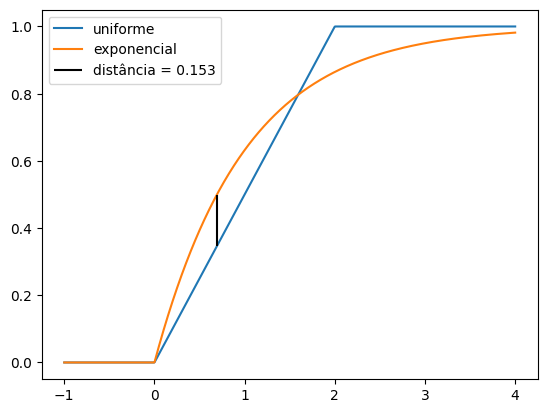

In [14]:
t_vals = np.linspace(-1,4,1000)
ac_u, ac_e = acumulada_uniforme(t_vals), acumulada_exponencial(t_vals)

plt.plot(t_vals, ac_u, label='uniforme')
plt.plot(t_vals, ac_e, label='exponencial')

argmax = np.argmax(np.abs(ac_u-ac_e))
plt.vlines(t_vals[argmax], ac_u[argmax], 
           ac_e[argmax], 'k',
           label=f'distância = {np.max(np.abs(ac_u-ac_e)).round(3)}')

plt.legend()
plt.show()

## Teste KS com amostras


Se eu não tenho a função densidade acumulada exata mas tenho uma amostra, é possível calcular uma estimativa pra sua densidade acumulada.

Relembrando o significado de $F_X(t)$ como 

$$F_X(t) = \mathbb{P}_{X}((-\infty,t]) = \mathbb{P}(X\leq t)$$

Podemos olhar na nossa amostra qual a proporção de elementos que têm valor menor ou igual a $t$!

Neste caso, temos

$$ \widehat{F}_X(t) = \frac{ \textrm{número de amostras menores ou iguais a t}}{\textrm{número total de elementos}} .  $$

![](images_prob/ks_sample.png)

In [15]:
n = 500

amostra1 = np.random.RandomState(42).uniform(0, 2, n)
amostra2 = np.random.RandomState(42).exponential(1, n)

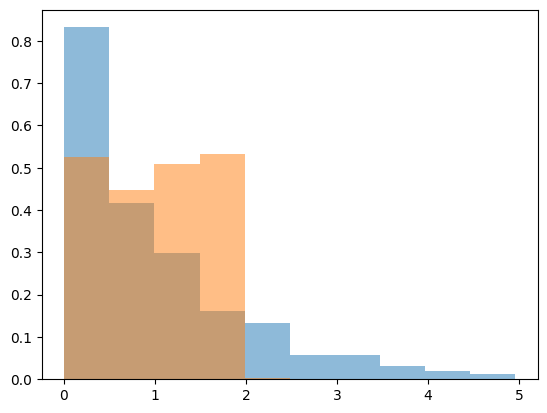

In [16]:
_, bins, _ = plt.hist(amostra2, alpha=0.5, density=True, bins=10)
plt.hist(amostra1, alpha=0.5, density=True, bins=bins)
plt.show()

In [17]:
def return_acumulada_estimada(x):
    def acumulada(t):
        return [(x<=t_).sum()/len(x) for t_ in t]
    return acumulada

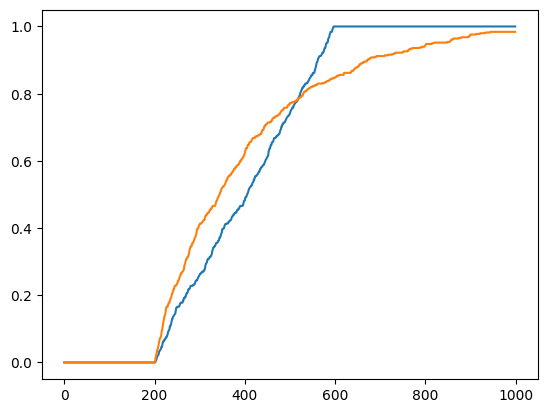

In [18]:
plt.plot(return_acumulada_estimada(amostra1)(t_vals))
plt.plot(return_acumulada_estimada(amostra2)(t_vals))
plt.show()

In [19]:
from scipy.stats import ks_2samp
# from scipy.stats import kstest, ks_1samp
ks, pvalue = ks_2samp(amostra1, amostra2)
ks

0.154

## KS como métrica de classificação

Como o teste KS mede bem o quanto duas distribuições estão separadas, é comum utilizá-lo para avaliar o quão bem um classificador separa amostras de classes diferentes.

Por exemplo, se fizermos um problema toy de regressão:

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

log_reg = LogisticRegression().fit(X_train,y_train)

y_prev_prob = log_reg.predict_proba(X_test)[:,1]

Gostaríamos que o nosso classificador jogasse todos os elementos da classe 0 para valores perto do 0 e todos os elementos da classe 1 para valores perto de 1. Pela natureza ruídosa do problema, mesmo um classificador muito bom não consegue fazer isso e existe alguma intersecção entre os valores previstos para os dois subgrupos.

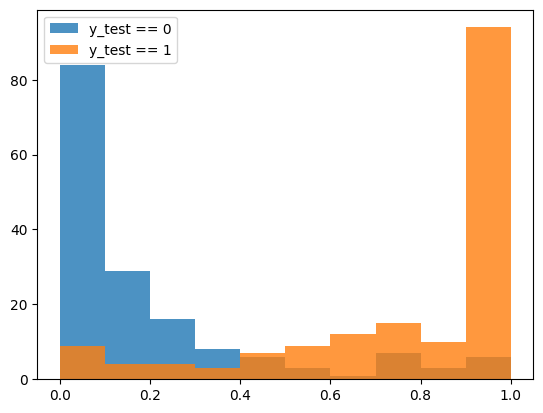

In [21]:
plt.hist(y_prev_prob[y_test==0], bins=np.linspace(0,1,11), alpha=0.8, label='y_test == 0')
plt.hist(y_prev_prob[y_test==1], bins=np.linspace(0,1,11), alpha=0.8, label='y_test == 1')
plt.legend()
plt.show()

A ideia aqui é justamente quantificar o quão separado esses subgrupos ficaram nesse espaço de scores cuspidos pelo modelo. Para isso aplicamos o teste KS medindo a distância da distribuição dos scores dos elementos da classe 1 versus a distribuição de scores dos elementos da classe 0.

ks=0.7268652878292495


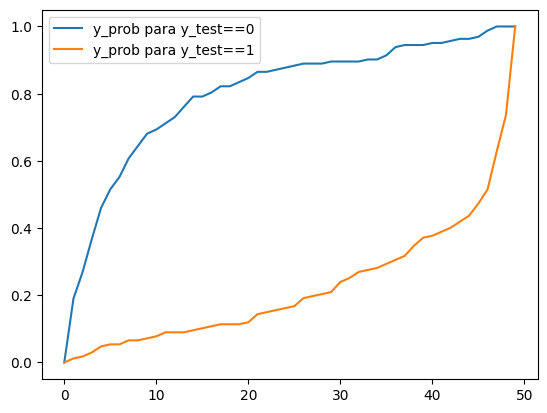

In [22]:
ks, pvalue = ks_2samp(y_prev_prob[y_test==0], y_prev_prob[y_test==1])
print(f"{ks=}")

plt.plot(return_acumulada_estimada(y_prev_prob[y_test==0])(np.linspace(0,1)), label='y_prob para y_test==0')
plt.plot(return_acumulada_estimada(y_prev_prob[y_test==1])(np.linspace(0,1)), label='y_prob para y_test==1')
plt.legend()
plt.show()

___